[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielsaraivaleite/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster: 0


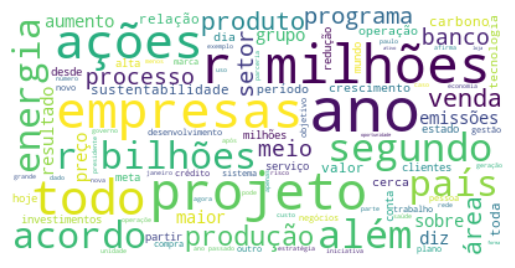

Cluster: 1


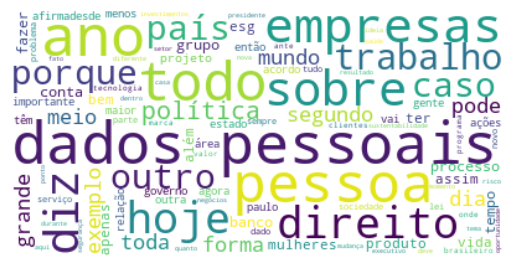

Cluster: 2


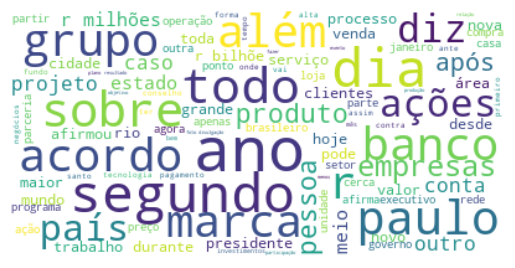

In [8]:
import pandas as pd
import wikipedia
from nltk.corpus import stopwords 
import nltk
from sklearn.cluster import KMeans
nltk.download('stopwords')
import matplotlib.pyplot as plt



df = pd.read_excel('datasets/base_noticias.xlsx')

sw = stopwords.words('portuguese')
sw.append('petrobras')
sw.append('empresa')
sw.append('companhia')
sw.append('mercado')
sw.append('ainda')
sw.append('cliente')
sw.append('disse')
sw.append('investimento')
sw.append('negócio')
sw.append('brasil')


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'portuguese'})
X = vectorizer.fit_transform((df['texto_completo']))



true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
df['cluster']=model.labels_



from wordcloud import WordCloud
#result={'cluster':labels,'wiki':wiki_lst}
#result=pd.DataFrame(result)
result = df
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['texto_completo'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = sw).generate(text)
   print('Cluster: {}'.format(k))
   #print('Titles')
   #titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()


In [13]:
df.groupby(by=['classificacao', 'cluster']).count()

titulo  data_publicacao   url  fonte  empresa  \
classificacao cluster                                                  
E             0          1313             1313  1313   1313     1313   
              1          1627             1627  1627   1627     1627   
              2           837              837   837    837      837   
G             0          1675             1675  1675   1675     1675   
              1           871              871   871    871      871   
              2           622              622   622    622      622   
S             0           370              370   370    370      370   
              1           258              258   258    258      258   
              2           255              255   255    255      255   

                       texto_completo  citacoes_empresa  demais_citacoes  \
classificacao cluster                                                      
E             0                  1313              1313             1313   
              1                  1627              1627             1627   
              2                   837               837              837   
G             0                  1675              1675             1675   
              1                   871               871              871   
              2                   622               622              622   
S             0                   370               370              370   
              1                   258               258              258   
              2                   255               255              255   

                       relevante  
classificacao cluster             
E             0             1313  
              1             1627  
              2              837  
G             0             1675  
              1              871  
              2              622  
S             0              370  
              1              258  
              2              255